#                                     WALMART PROJECT

#### Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

#### BUSINESS PROBLEM:

### The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically,purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

# Dataset:
The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:

User_ID:	User ID

Product_ID:	Product ID

Gender:	Sex of User

Age:	Age in bins

Occupation:	Occupation(Masked)

City_Category:	Category of the City (A,B,C)

StayInCurrentCityYears:	Number of years stay in current city

Marital_Status:	Marital Status

ProductCategory:	Product Category (Masked)

Purchase:	Purchase Amount


In [152]:
#IMPORTING REQUIRED LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm,probplot
import missingno as msno
from sklearn.utils import resample

In [153]:
df=pd.read_csv('walmart_data.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


### Checking the structure & characteristics of the dataset

In [154]:
df.shape

(550068, 10)

In [155]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [156]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [157]:
#number of unique values in the  dataset
for i in df.columns:
    print(i, ';',df[i].nunique())

User_ID ; 5891
Product_ID ; 3631
Gender ; 2
Age ; 7
Occupation ; 21
City_Category ; 3
Stay_In_Current_City_Years ; 5
Marital_Status ; 2
Product_Category ; 20
Purchase ; 18105


## Missing values

In [158]:
#checking if ther is any null values
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

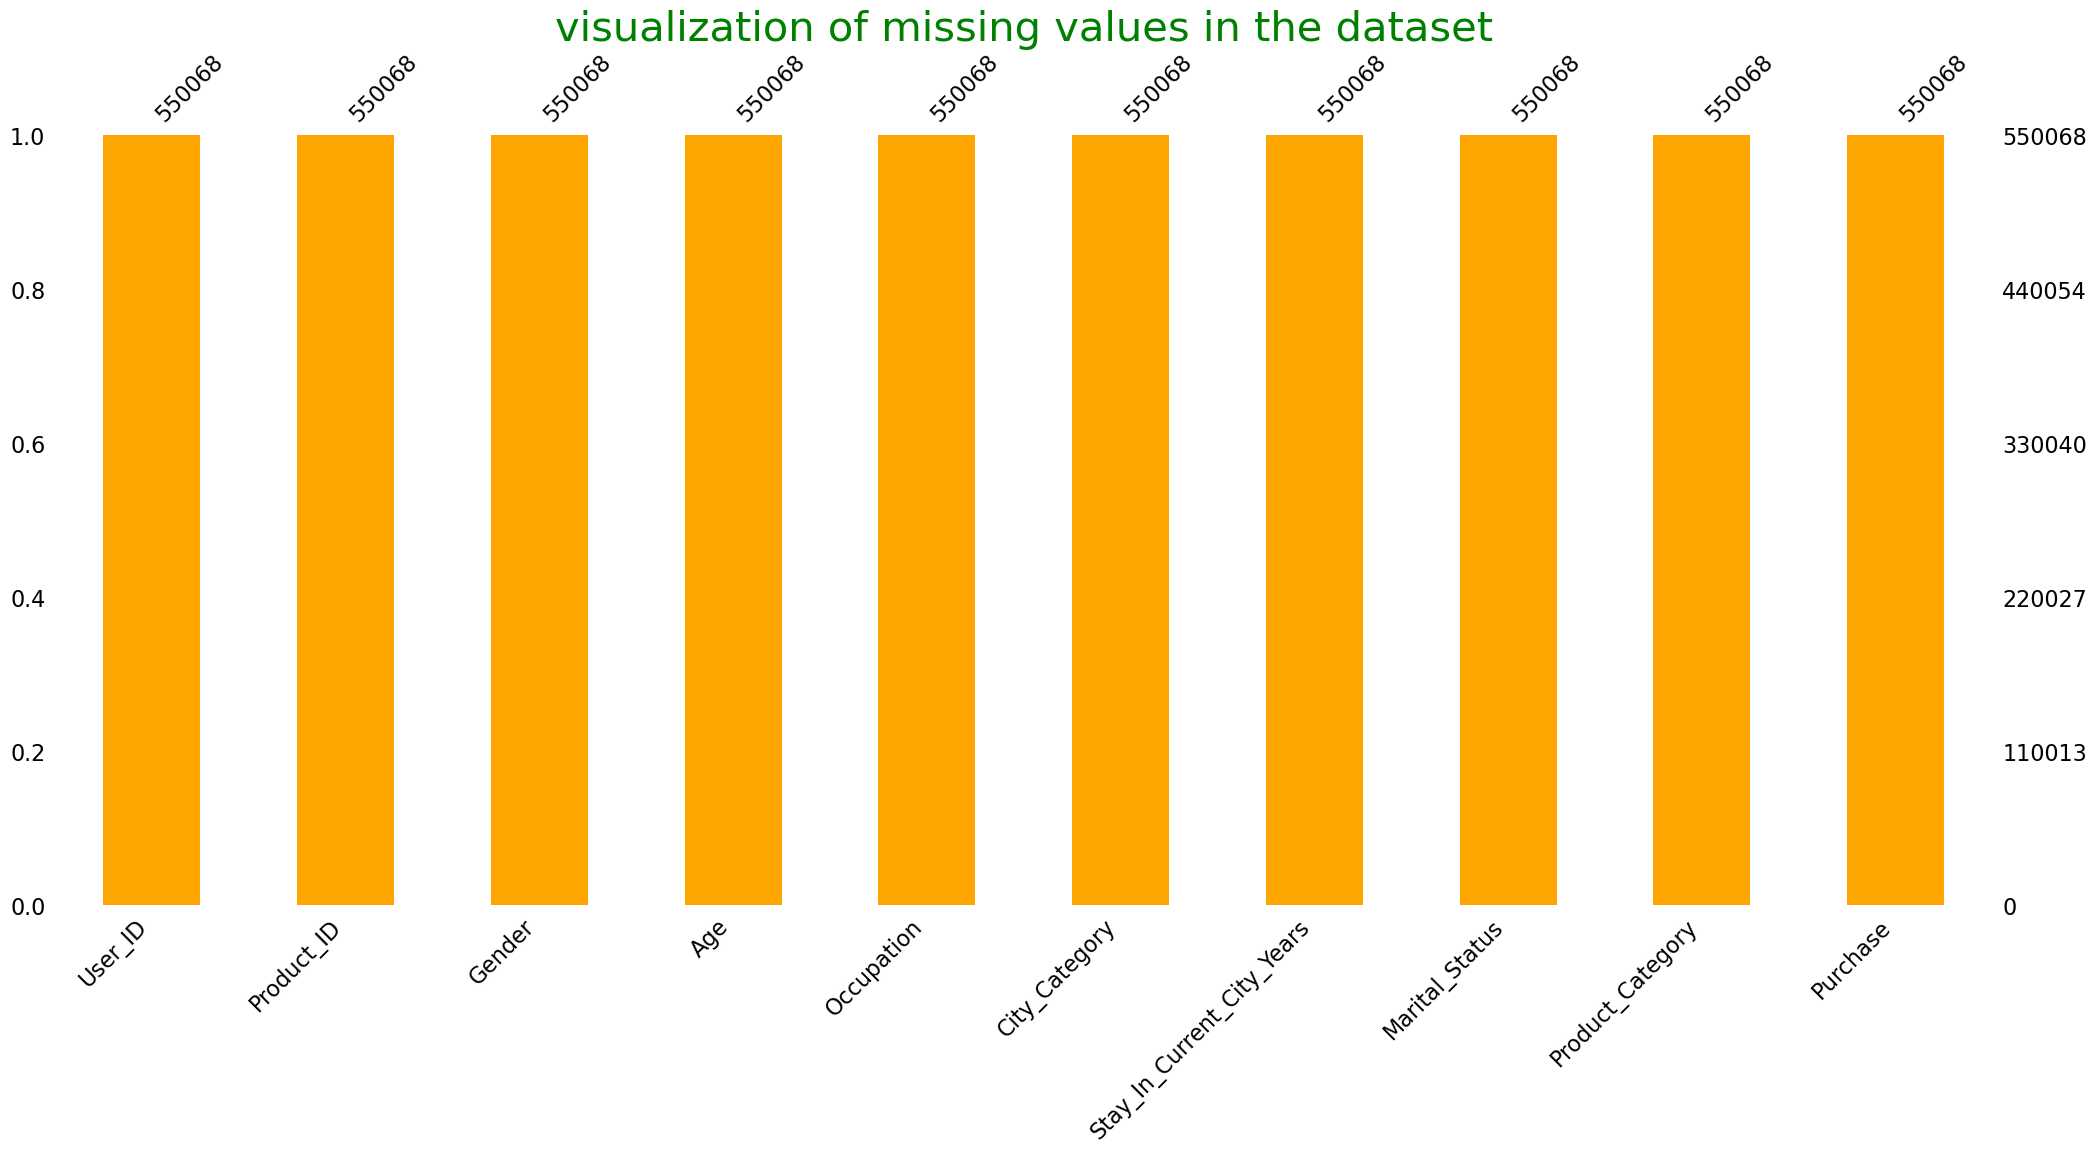

In [159]:
#visualizing missing values
msno.bar(df,color='orange')
plt.title('visualization of missing values in the dataset',size=30,color='green')
plt.show()

#### there is no null values in the dataset

## analyzing each collumns

In [160]:
df.User_ID.value_counts()


1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [269]:
df.Product_ID.value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

<AxesSubplot:title={'center':'Gender'}, ylabel='Gender'>

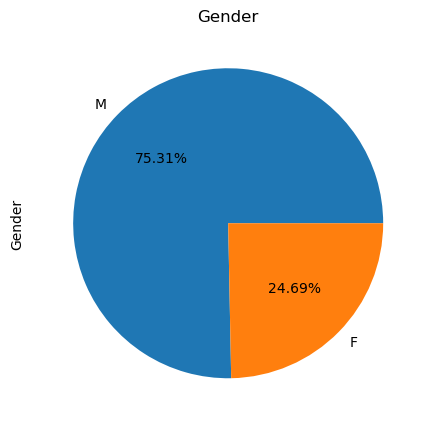

In [161]:
df.Gender.value_counts().plot(kind='pie',figsize=(5,8),autopct="%.2f%%",title='Gender')

#### M stands for Male , F stand sfor Female

In [162]:
df.Marital_Status.value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

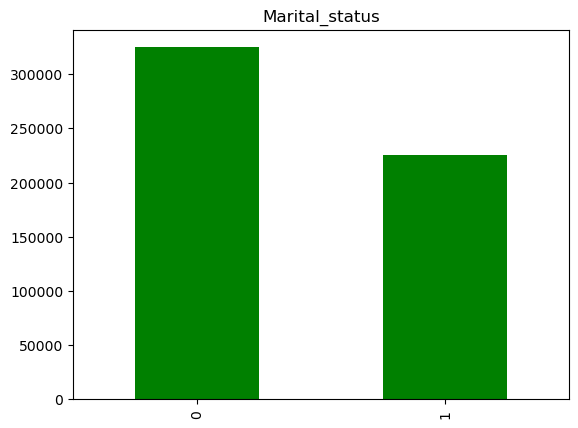

In [163]:
#visualization of marital status
df.Marital_Status.value_counts().plot(kind='bar',color='green')
plt.title('Marital_status')
plt.show()

### 0 stands for unmarried and 1 stands for married people

In [164]:
df.City_Category.value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

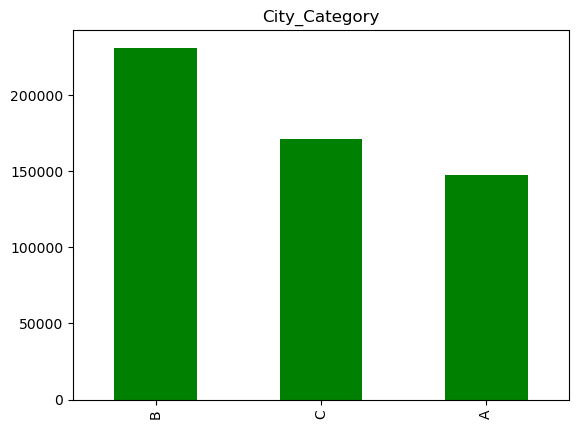

In [165]:
#visualization of City_Category
df.City_Category.value_counts().plot(kind='bar',color='green')
plt.title('City_Category')
plt.show()

In [166]:
df.Stay_In_Current_City_Years.value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

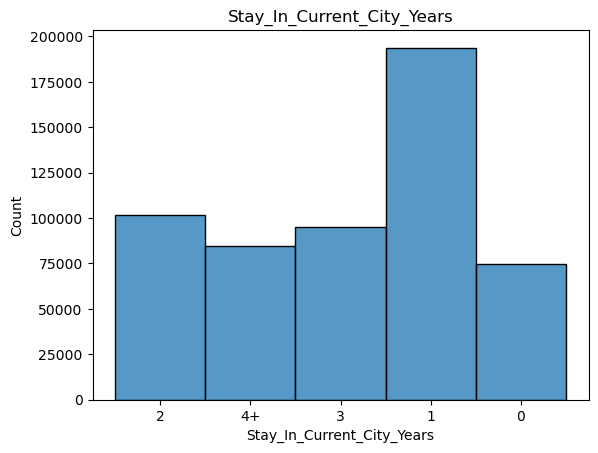

In [167]:
#visualization of marital status
sns.histplot(df['Stay_In_Current_City_Years'])
plt.title('Stay_In_Current_City_Years')
plt.show()

In [168]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [169]:
df.Age.value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

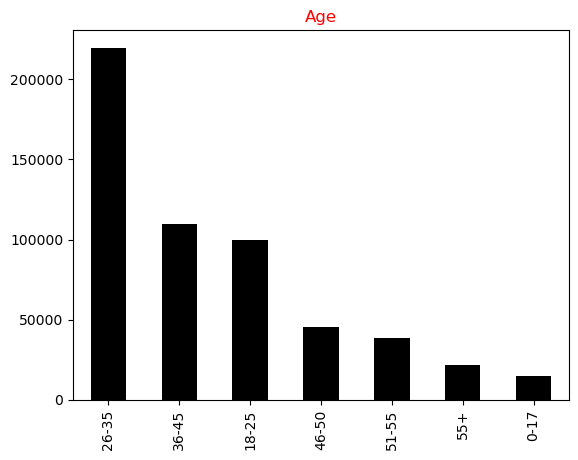

In [170]:
#visualization of age
df.Age.value_counts().plot(kind='bar',color='black')
plt.title('Age',color='red')
plt.show()

In [171]:
df.Occupation.value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

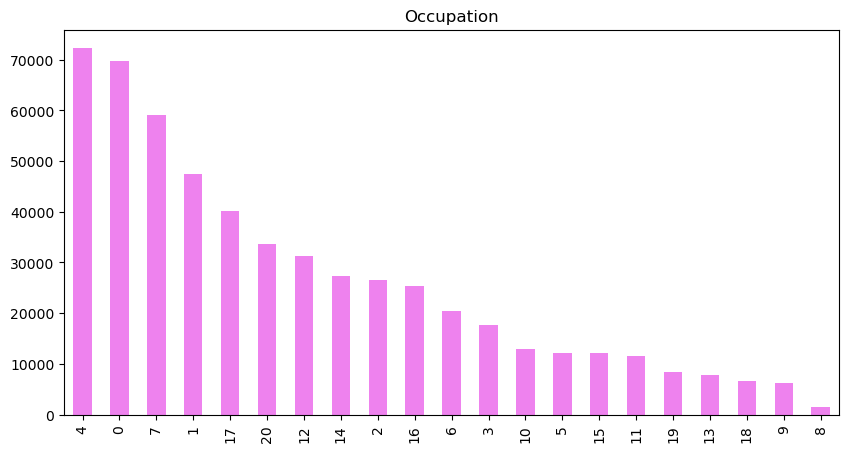

In [172]:
#visualization of age
df.Occupation.value_counts().plot(kind='bar',color='violet',figsize=(10,5))
plt.title('Occupation')
plt.show()



Text(0.5, 1.0, 'Gender vs City Category')

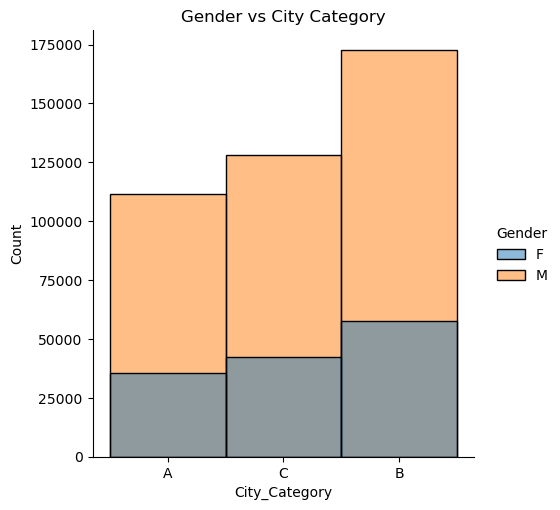

In [173]:
sns.displot(data=df1, x='City_Category',hue='Gender')
plt.title('Gender vs City Category')


# detecting outliers

In [174]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


#### here the difference between mean and median is larger in Purchase , so we can say column Purchase has more outliers.

C:\Users\smm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Purchase'>

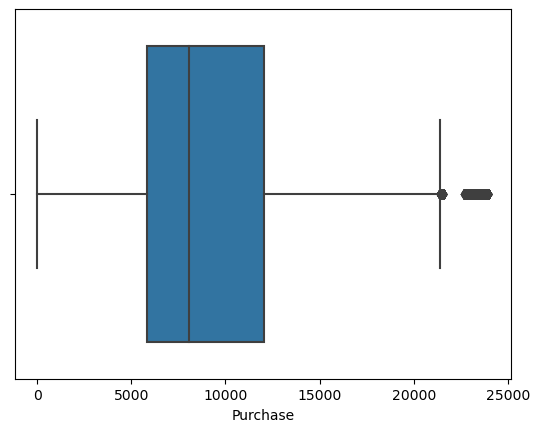

In [175]:
sns.boxplot(df['Purchase'])

### removing outliers

In [176]:
q1=df['Purchase'].quantile(.25)
q1

5823.0

In [177]:
q2=df['Purchase'].quantile(.50)
q2

8047.0

In [178]:
q3=df['Purchase'].quantile(.75)
q3

12054.0

In [179]:
iqr=q3-q1
iqr

6231.0

In [180]:
lower=q1-(1.5)*iqr
lower

-3523.5

In [181]:
higher=q3+(1.5)*iqr
higher

21400.5

In [182]:
df_o= df[(df['Purchase']<lower) | (df['Purchase']>higher)]
df_o

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
343,1000058,P00117642,M,26-35,2,B,3,0,10,23603
375,1000062,P00119342,F,36-45,3,A,1,0,10,23792
652,1000126,P00087042,M,18-25,9,B,1,0,10,23233
736,1000139,P00159542,F,26-35,20,C,2,0,10,23595
1041,1000175,P00052842,F,26-35,2,B,1,0,10,23341
...,...,...,...,...,...,...,...,...,...,...
544488,1005815,P00116142,M,26-35,20,B,1,0,10,23753
544704,1005847,P00085342,F,18-25,4,B,2,0,10,23724
544743,1005852,P00202242,F,26-35,1,A,0,1,10,23529
545663,1006002,P00116142,M,51-55,0,C,1,1,10,23663


####  _this data contains 2677 rows of outlier values.

### data after removing outlier values:

In [183]:
df1= df[~((df['Purchase']<lower) | (df['Purchase']>higher))]
df1

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [184]:
df1.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135220.0,8671.049039,4679.058483,12.0,5429.0,7906.0,11064.0,21398.0
M,412171.0,9367.724355,5009.234088,12.0,5852.0,8089.0,12247.0,21399.0


<AxesSubplot:ylabel='Purchase'>

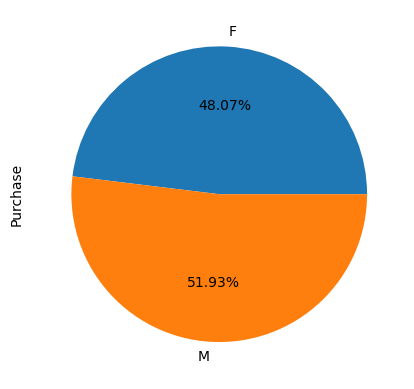

In [185]:
df1.groupby(['Gender'])['Purchase'].mean().plot(kind='pie',autopct='%.2f%%')

### avrage purchase of male is greater than female.most amount spent per transaction is by male

In [186]:
df1.groupby(['Gender'])['Purchase'].sum().reset_index()

,Gender,Purchase
0,F,1172499251
1,M,3861104315


<AxesSubplot:ylabel='Purchase'>

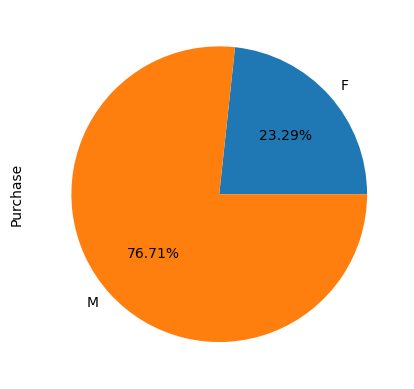

In [187]:
df1.groupby(['Gender'])['Purchase'].sum().plot(kind='pie',autopct='%.2f%%')

#### 76% of the purchases were made by men

## Age and Purchase

In [188]:
df1.groupby(['Age'])['Purchase'].count().reset_index()

,Age,Purchase
0,0-17,15032
1,18-25,99334
2,26-35,218661
3,36-45,109409
4,46-50,45442
5,51-55,38191
6,55+,21322


<AxesSubplot:title={'center':'Age and purchase'}, xlabel='Age'>

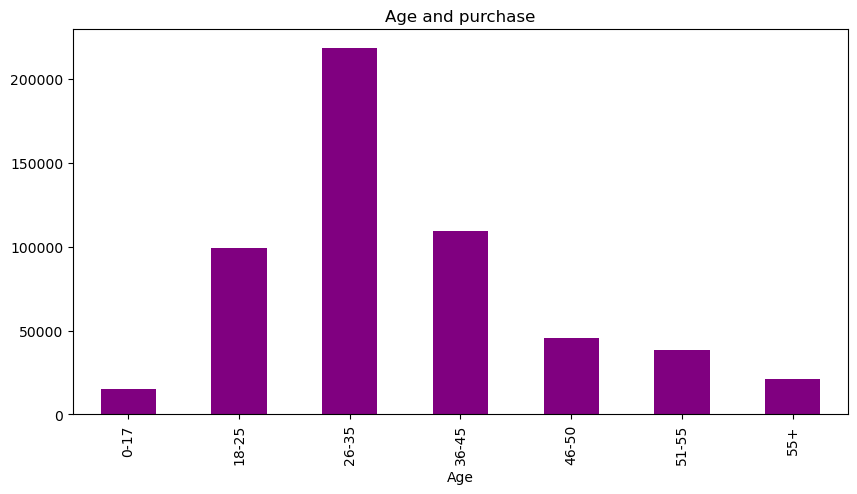

In [189]:
df1.groupby(['Age'])['Purchase'].count().plot(kind='bar',color='purple',figsize=(10,5),title='Age and purchase')

#### People between the ages of 26-35 make the most purchases 

## Age gender and purchase

In [190]:
df1.groupby(['Age','Gender'])['Purchase'].count().reset_index()

,Age,Gender,Purchase
0,0-17,F,5062
1,0-17,M,9970
2,18-25,F,24582
3,18-25,M,74752
4,26-35,F,50560
5,26-35,M,168101
6,36-45,F,27036
7,36-45,M,82373
8,46-50,F,13136
9,46-50,M,32306


Text(0.5, 1.0, 'Age,Gender and Purchase')

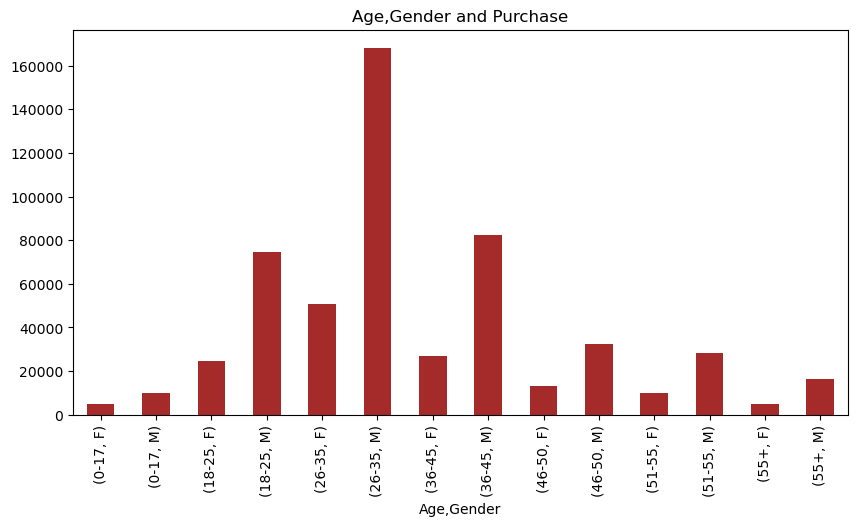

In [191]:
df1.groupby(['Age','Gender'])['Purchase'].count().plot(kind='bar',color='brown',figsize=(10,5))
plt.title('Age,Gender and Purchase')

#### Males between the ages of 26-35 make the most purchases¶

#pairplot
sns.pairplot(df1,hue='Gender')
plt.show()

#correlation
sns.heatmap(df.corr(),annot=True)
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='count'>

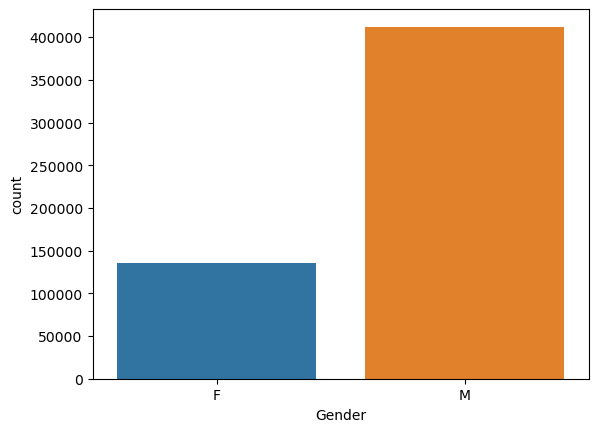

In [258]:
sns.countplot(data=df1,x='Gender')

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

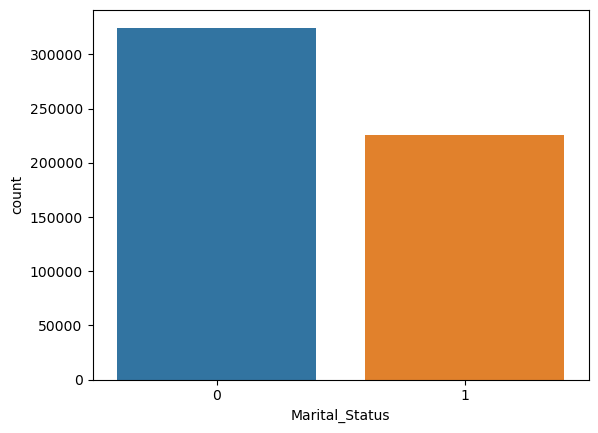

In [259]:
sns.countplot(data=df, x='Marital_Status')

<AxesSubplot:xlabel='Product_Category', ylabel='count'>

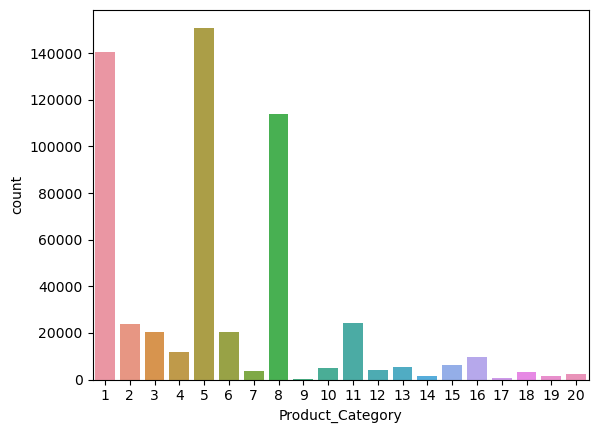

In [260]:
sns.countplot(data=df, x='Product_Category')

<AxesSubplot:xlabel='Occupation', ylabel='count'>

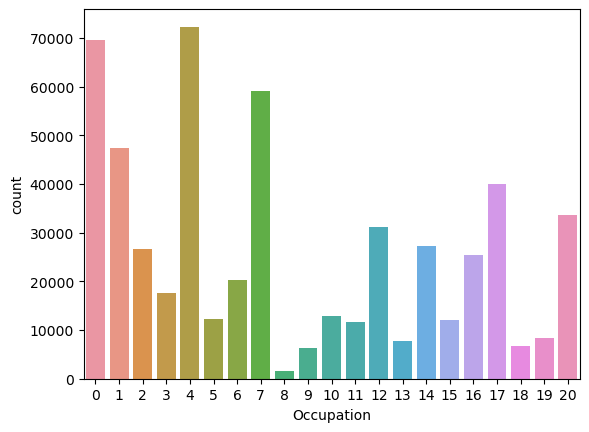

In [261]:
sns.countplot(data=df, x='Occupation')

<AxesSubplot:xlabel='City_Category', ylabel='count'>

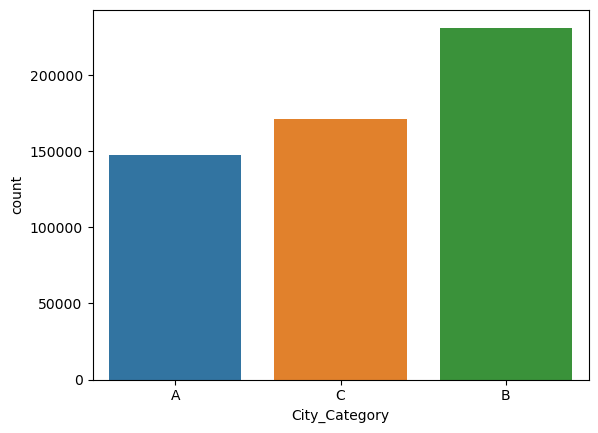

In [262]:
sns.countplot(data=df, x='City_Category')

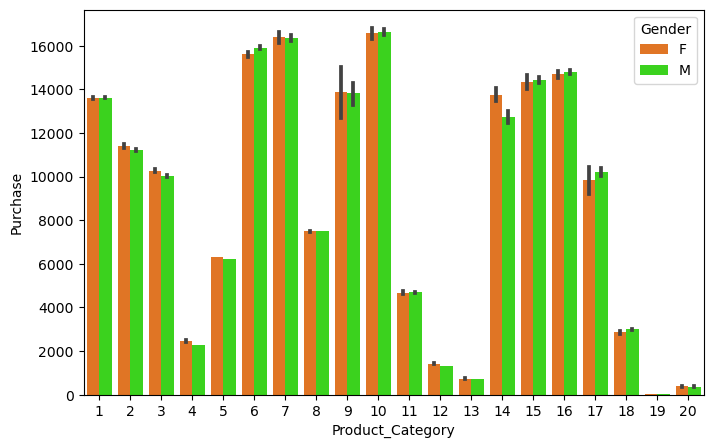

In [266]:
plt.figure(figsize=(8,5))
sns.barplot(data = df1, x = 'Product_Category', y = 'Purchase', hue = 'Gender',palette='gist_ncar_r')
plt.show()

## Purchase amount and Marital status

<AxesSubplot:xlabel='Marital_Status'>

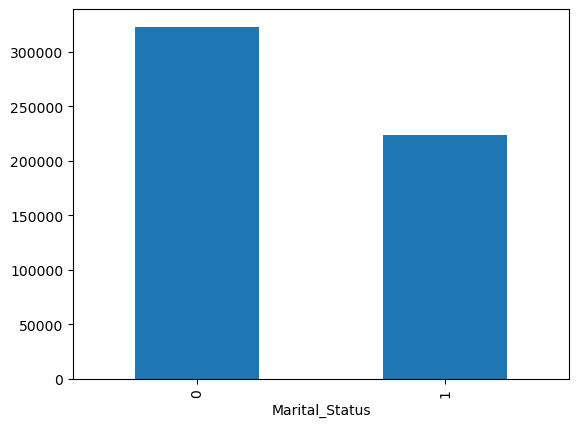

In [192]:
df1.groupby('Marital_Status')['Purchase'].count().plot(kind='bar')


#### Purchases are made by unmarried people more than married people.

## #mean Purchase amount by Marital_Status


<AxesSubplot:ylabel='Purchase'>

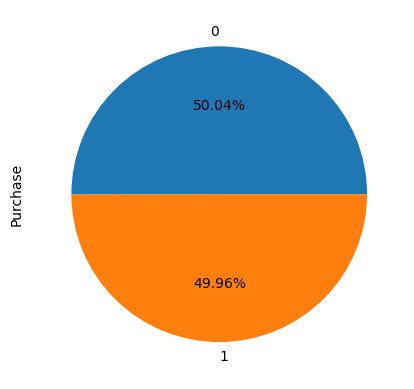

In [193]:
df1.groupby('Marital_Status')['Purchase'].mean().plot(kind='pie',autopct='%.2f%%')

#### The average purchasing amount of married and unmarried people is almost equal. 

# Central limit theorem & Confidence interval

## Purchase

<AxesSubplot:xlabel='Purchase', ylabel='Density'>

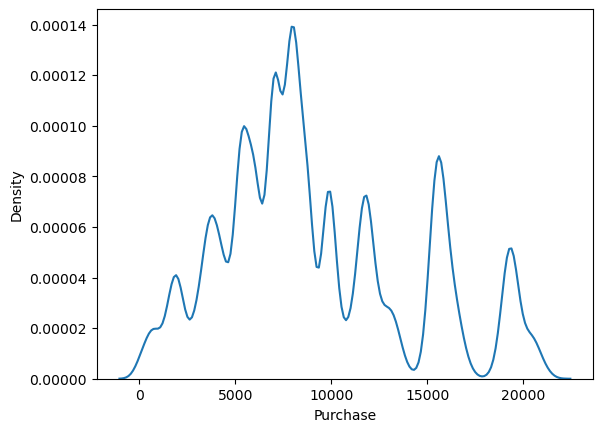

In [194]:
sns.kdeplot(data=df1,x='Purchase')

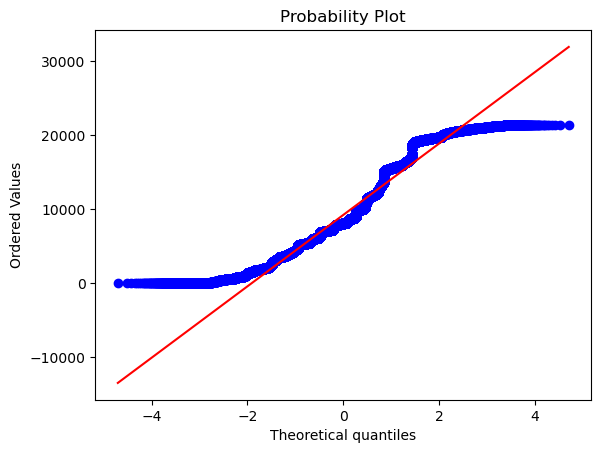

In [195]:
plt.figure()
probplot(df1['Purchase'],plot=plt)
plt.show()

#### from this plot we can say that,this is not a normal ditribution.

## Bootstrap Sampling

In [196]:

purchase_bootstrap_mean = []
sample_size = 500
for i in range(5000):
 s=resample(df1['Purchase'],n_samples=sample_size)

 m=np.mean(s)
 purchase_bootstrap_mean.append(m)


In [197]:
purchase_bootstrap_mean 

[9143.116,
 9349.186,
 9505.672,
 9504.73,
 9256.856,
 8861.948,
 8796.89,
 9233.392,
 8916.602,
 9228.886,
 9151.566,
 9093.03,
 8928.434,
 9319.708,
 9765.236,
 9294.378,
 9219.032,
 9581.904,
 8987.746,
 9054.35,
 9307.352,
 9418.346,
 9383.762,
 8947.952,
 9195.734,
 9089.81,
 9022.248,
 9191.994,
 9080.876,
 9545.354,
 9125.308,
 9593.968,
 9159.52,
 9426.29,
 8940.516,
 9141.912,
 8896.678,
 9018.018,
 8922.526,
 9262.014,
 9433.686,
 9408.076,
 8884.672,
 9195.296,
 9486.166,
 9167.86,
 9100.75,
 9478.488,
 9310.384,
 9547.206,
 9079.22,
 9285.324,
 9253.552,
 9382.078,
 9089.704,
 8861.51,
 9571.138,
 9222.942,
 9579.192,
 9117.142,
 8862.774,
 9246.636,
 9315.912,
 9281.45,
 9311.29,
 9696.724,
 9166.192,
 9301.338,
 9708.878,
 9012.336,
 9116.512,
 9034.456,
 9310.812,
 9087.266,
 9311.648,
 9183.686,
 8679.8,
 9543.388,
 9266.192,
 9035.598,
 8897.118,
 9381.466,
 9600.988,
 9208.04,
 9059.654,
 9659.454,
 8846.904,
 9142.36,
 8471.998,
 9449.782,
 9605.32,
 9286.726,
 9019.

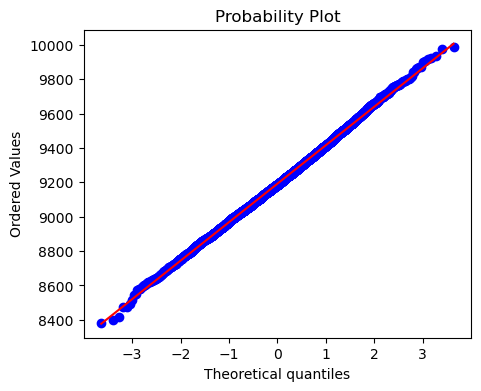

In [198]:
plt.figure(figsize=(5,4))
probplot(purchase_bootstrap_mean ,plot=plt)
plt.show()

#### The sample average is found via bootstrap sampling and the means follow normal distribution for population purchase

<AxesSubplot:ylabel='Density'>

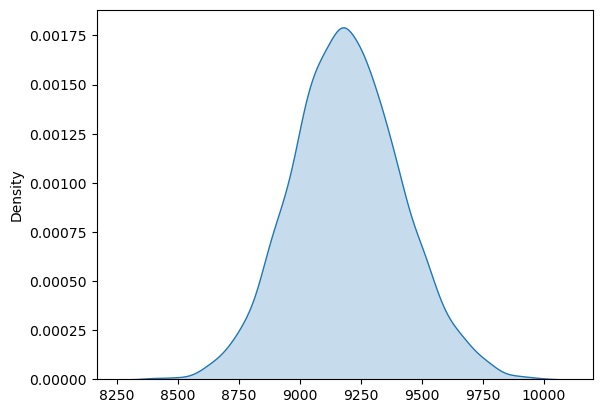

In [199]:
#normalized purchase
sns.kdeplot(purchase_bootstrap_mean,x='Purchase',fill=True)

In [200]:
confidence = [90,95,99]
for i in range(3):
 diff = (100-confidence[i])
 lower = diff/2
 upper = confidence[i] + (diff/2)
 x=np.percentile(purchase_bootstrap_mean,[lower,upper])
 print(f'{confidence[i]}% chance to occur between intervals {x[0]} and {x[1]} \n')

90% chance to occur between intervals 8835.546400000001 and 9570.2912 

95% chance to occur between intervals 8762.976999999999 and 9651.712 

99% chance to occur between intervals 8632.291439999999 and 9783.9649 



## Customers (Gender= Male)

In [201]:
male_purchase=df1[df1['Gender']=='M']
male_purchase

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
...,...,...,...,...,...,...,...,...,...,...
550057,1006023,P00370853,M,26-35,0,C,2,1,19,61
550058,1006024,P00372445,M,26-35,12,A,0,1,20,121
550060,1006026,P00371644,M,36-45,6,C,1,1,20,494
550062,1006032,P00372445,M,46-50,7,A,3,0,20,473


<AxesSubplot:xlabel='Purchase', ylabel='Density'>

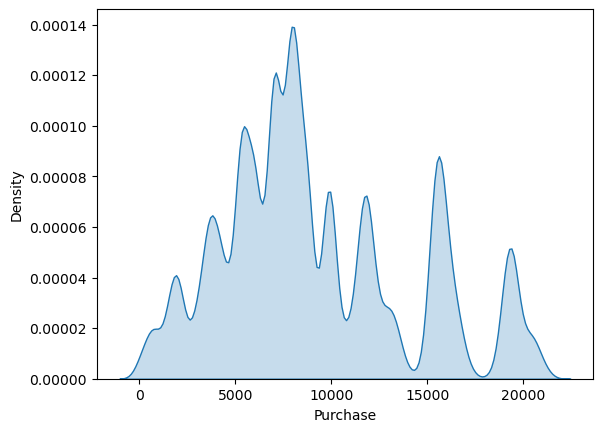

In [202]:
sns.kdeplot(data=df1,x='Purchase',fill=True)

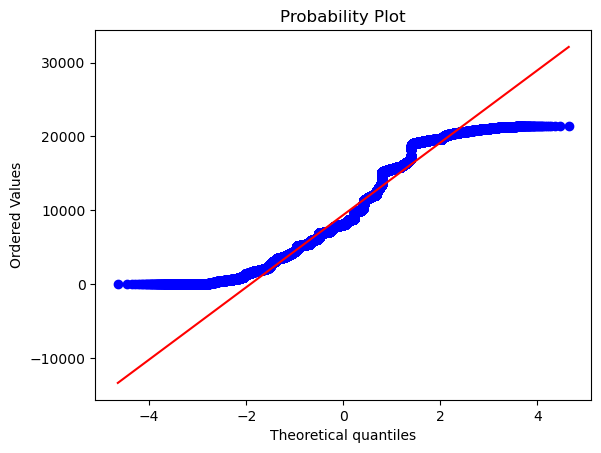

In [203]:
plt.figure()
probplot(male_purchase['Purchase'],plot=plt)
plt.show()

#### this is also not a normal distribution. so use bootstrampling

In [204]:
male_purchase_boots_mean = []
sample_size = 25000
for i in range(5000):
 s=resample(male_purchase['Purchase'],n_samples=sample_size)
 m=np.mean(s)
 male_purchase_boots_mean.append(m)

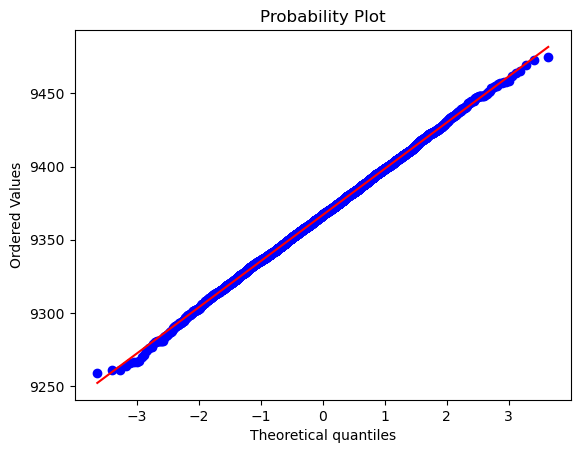

In [205]:
plt.figure()
probplot(male_purchase_boots_mean,plot=plt)
plt.show()

<AxesSubplot:ylabel='Density'>

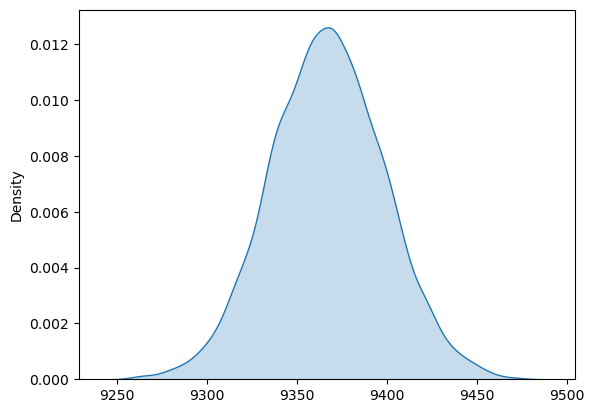

In [206]:
#normalized male purchase
sns.kdeplot(male_purchase_boots_mean,x='Purchase',fill=True)

In [207]:
confidence = [90,95,99]
for i in range(3):
 diff = (100-confidence[i])
 lower = diff/2
 upper = confidence[i] + (diff/2)
 x=np.percentile(male_purchase_boots_mean,[lower,upper])
 print(f'{confidence[i]}% chance to occur between intervals {x[0]} and {x[1]} \n')

90% chance to occur between intervals 9315.343222 and 9419.367528 

95% chance to occur between intervals 9305.099054 and 9428.722522999999 

99% chance to occur between intervals 9282.8004044 and 9448.447091799999 



## Customers (Gender= FeMale)

In [208]:
female_purchase=df1[df1['Gender']=='F']
female_purchase

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
14,1000006,P00231342,F,51-55,9,A,1,0,5,5378
...,...,...,...,...,...,...,...,...,...,...
550061,1006029,P00372445,F,26-35,1,C,1,1,20,599
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


<AxesSubplot:xlabel='Purchase', ylabel='Density'>

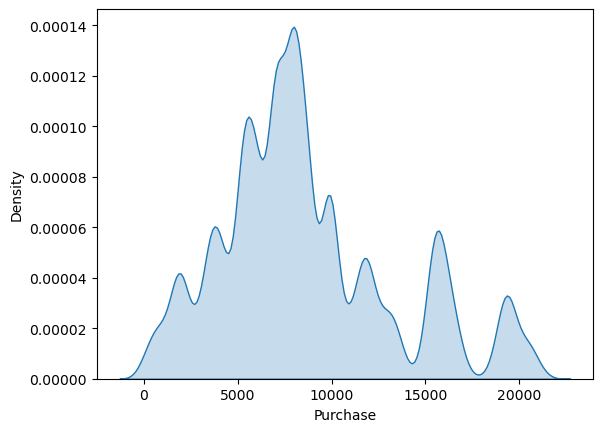

In [209]:
sns.kdeplot(data=female_purchase,x='Purchase',fill=True)

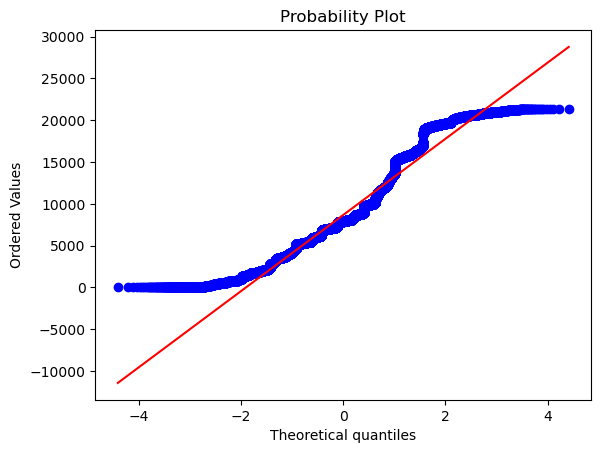

In [210]:
plt.figure()
probplot(female_purchase['Purchase'],plot=plt)
plt.show()

In [211]:
female_purchase_boot_mean = []
sample_size = 125000
for i in range(5000):
 s=resample(female_purchase['Purchase'],n_samples=sample_size)
 m=np.mean(s)
 female_purchase_boot_mean.append(m)

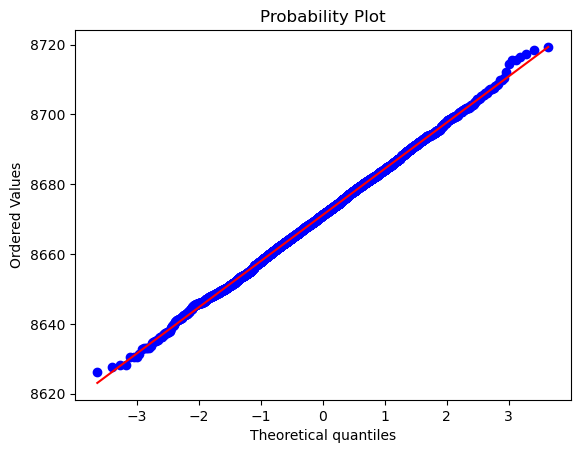

In [212]:
plt.figure()
probplot(female_purchase_boot_mean,plot=plt)
plt.show()

<AxesSubplot:ylabel='Density'>

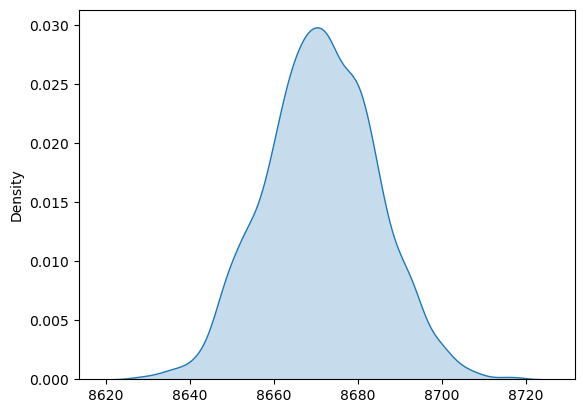

In [213]:
sns.kdeplot(female_purchase_boot_mean,x='Purchase',fill=True)

In [214]:
confidence = [90,95,99]
for i in range(3):
 diff = (100-confidence[i])
 lower = diff/2
 upper = confidence[i] + (diff/2)
 x=np.percentile(female_purchase_boot_mean,[lower,upper])
 print(f'{confidence[i]}% chance to occur between intervals {x[0]} and {x[1]} \n')

90% chance to occur between intervals 8649.3888976 and 8693.099982 

95% chance to occur between intervals 8646.111974000001 and 8697.2971056 

99% chance to occur between intervals 8636.89838216 and 8705.233792320001 



# male and female,overlapping?

[]

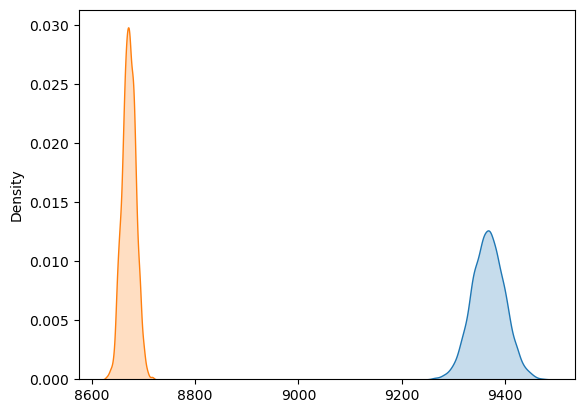

In [215]:
sns.kdeplot(male_purchase_boots_mean,fill=True)
sns.kdeplot(female_purchase_boot_mean,fill=True)
plt.plot()

#### no overlapping

# sample size reducing to 1000

# male

In [216]:
male_purchase_boots_mean1 = []
sample_size = 1000
for i in range(5000):
 s=resample(male_purchase['Purchase'],n_samples=sample_size)
 m=np.mean(s)
 male_purchase_boots_mean1.append(m)

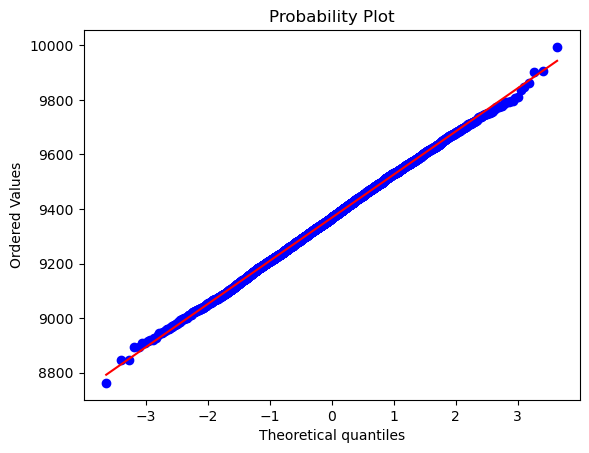

In [217]:
plt.figure()
probplot(male_purchase_boots_mean1,plot=plt)
plt.show()

<AxesSubplot:ylabel='Density'>

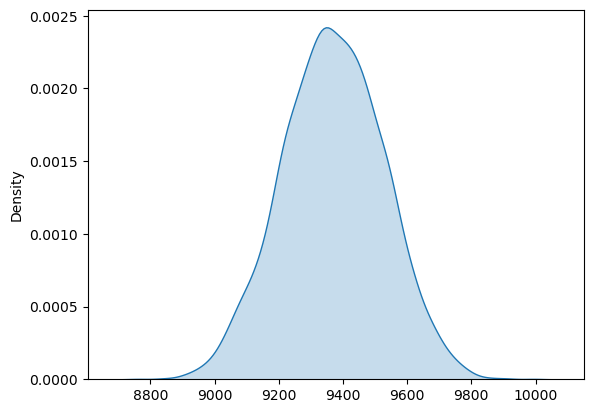

In [218]:
#normalized male purchase
sns.kdeplot(male_purchase_boots_mean1,x='Purchase',fill=True)

## female

In [219]:
female_purchase_boot_mean1 = []
sample_size = 1000
for i in range(5000):
 s=resample(female_purchase['Purchase'],n_samples=sample_size)
 m=np.mean(s)
 female_purchase_boot_mean1.append(m)

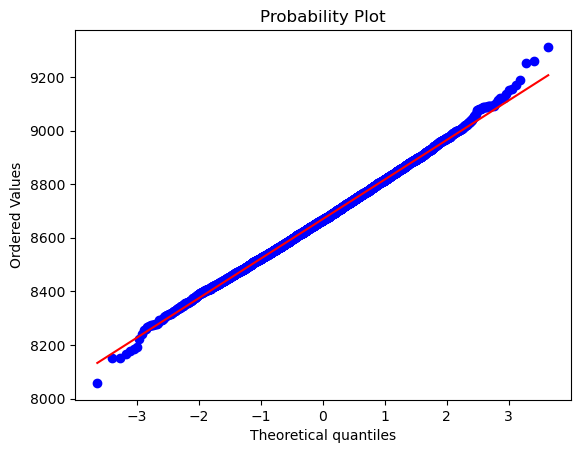

In [220]:
plt.figure()
probplot(female_purchase_boot_mean1,plot=plt)
plt.show()

<AxesSubplot:ylabel='Density'>

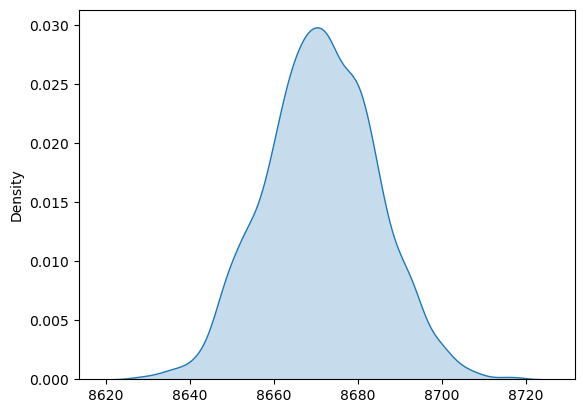

In [221]:
sns.kdeplot(female_purchase_boot_mean,x='Purchase',fill=True)

[]

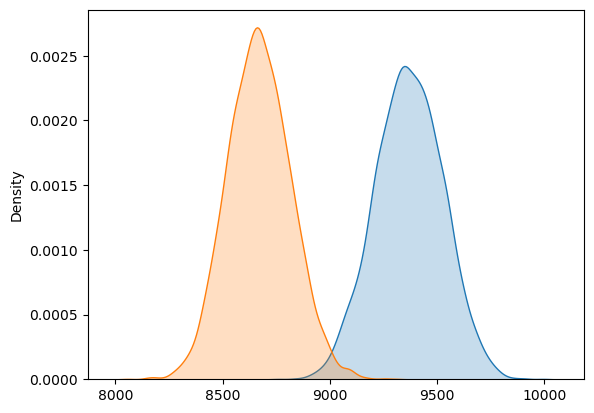

In [222]:
sns.kdeplot(male_purchase_boots_mean1,fill=True)
sns.kdeplot(female_purchase_boot_mean1,fill=True)
plt.plot()

### We can conclude that for increse in sample space confidance intervel's width increses and overlaps


# Married Customers

In [223]:
married_purchase=df1[df1['Marital_Status']==1]
married_purchase

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871
10,1000005,P00251242,M,26-35,20,A,1,1,5,5254
...,...,...,...,...,...,...,...,...,...,...
550060,1006026,P00371644,M,36-45,6,C,1,1,20,494
550061,1006029,P00372445,F,26-35,1,C,1,1,20,599
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137


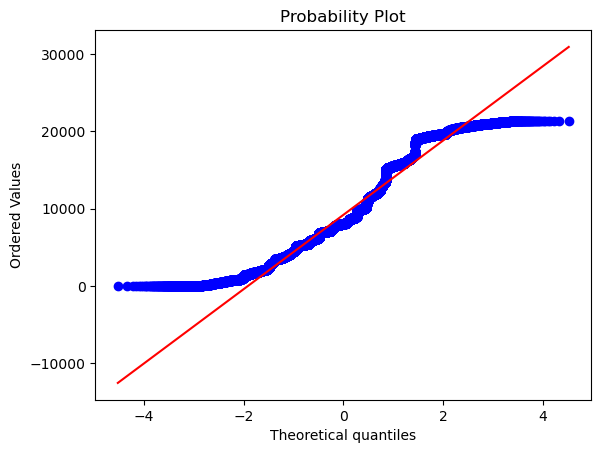

In [224]:
plt.figure()
probplot(married_purchase['Purchase'],plot=plt)
plt.show()

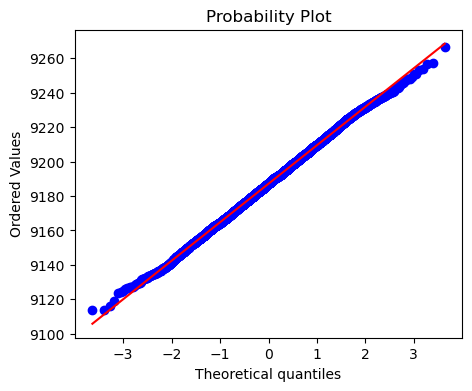

In [225]:
married_purchase_boot_mean = []
sample_size = 50000
for i in range(5000):
 s=resample(married_purchase['Purchase'],n_samples=sample_size)
 m=np.mean(s)
 married_purchase_boot_mean.append(m)


plt.figure(figsize=(5,4))
probplot(married_purchase_boot_mean,plot=plt)
plt.show()


# Unmarried Customers

In [226]:

Unmarried_customers=df1[df1['Marital_Status']==0]
Unmarried_customers

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550056,1006022,P00375436,M,26-35,17,C,4+,0,20,254
550059,1006025,P00370853,F,26-35,1,B,1,0,19,48
550062,1006032,P00372445,M,46-50,7,A,3,0,20,473
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371


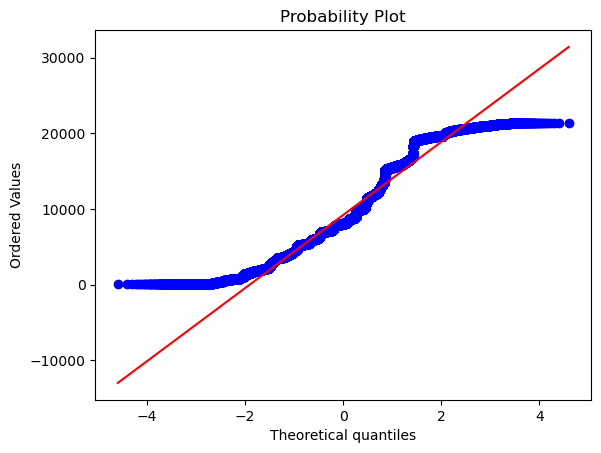

In [227]:
plt.figure()
probplot(Unmarried_customers['Purchase'],plot=plt)
plt.show()

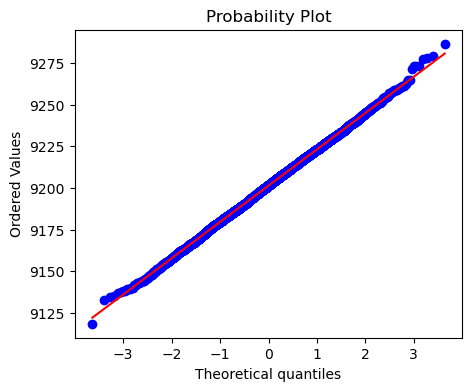

In [228]:
Unmarried_customers_boot_mean = []
sample_size = 50000
for i in range(5000):
 s=resample(Unmarried_customers['Purchase'],n_samples=sample_size)
 m=np.mean(s)
 Unmarried_customers_boot_mean.append(m)

plt.figure(figsize=(5,4))
probplot(Unmarried_customers_boot_mean,plot=plt)
plt.show()

[]

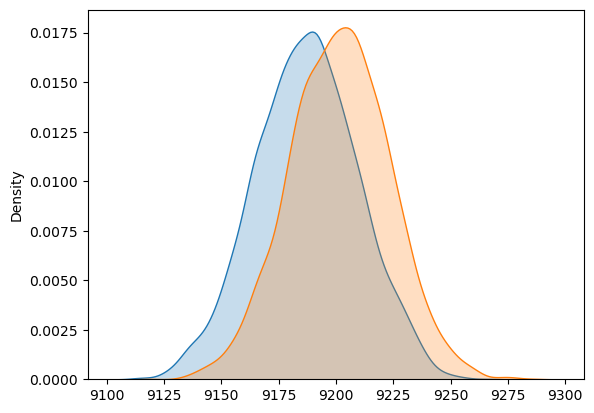

In [229]:
sns.kdeplot(married_purchase_boot_mean,fill=True)
sns.kdeplot(Unmarried_customers_boot_mean,fill=True)
plt.plot()


#### the distributions overlap each other


# Age : from 0 to 17

In [244]:
age_0_to_17=df1[df1['Age']=='0-17']
age_0_to_17

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
85,1000019,P00112542,M,0-17,10,A,3,0,1,7746
...,...,...,...,...,...,...,...,...,...,...
549904,1005803,P00375436,M,0-17,10,C,1,0,20,256
550012,1005953,P00370853,M,0-17,10,B,0,0,19,26
550024,1005973,P00370293,M,0-17,10,C,4+,0,19,12
550035,1005989,P00370853,F,0-17,10,C,3,0,19,61


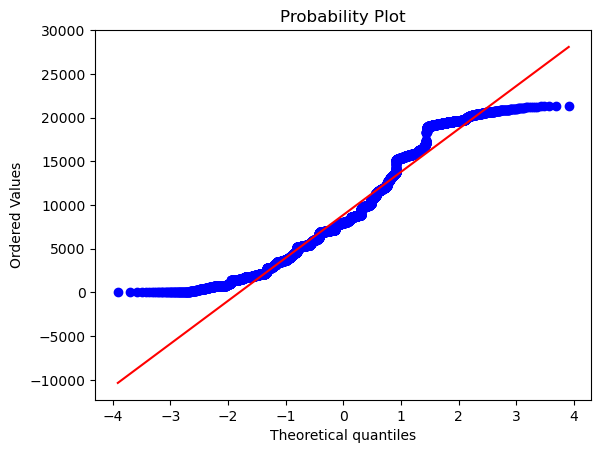

In [245]:
plt.figure()
probplot(age_0_to_17['Purchase'],plot=plt)
plt.show()


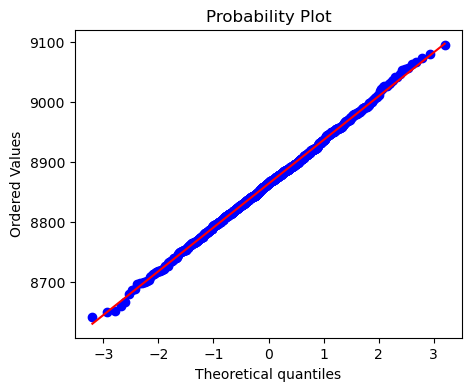

In [246]:
age_0_to_17_boots_mean = []
sample_size = 5000
for i in range(1000):
 s=resample(age_0_to_17['Purchase'],n_samples=sample_size)
 m=np.mean(s)
 age_0_to_17_boots_mean.append(m)


plt.figure(figsize=(5,4))
probplot(age_0_to_17_boots_mean,plot=plt)
plt.show()

# Age : from 18 to 25

In [247]:
age_18_to_25=df1[df1['Age']=='0-17']
age_18_to_25

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
85,1000019,P00112542,M,0-17,10,A,3,0,1,7746
...,...,...,...,...,...,...,...,...,...,...
549904,1005803,P00375436,M,0-17,10,C,1,0,20,256
550012,1005953,P00370853,M,0-17,10,B,0,0,19,26
550024,1005973,P00370293,M,0-17,10,C,4+,0,19,12
550035,1005989,P00370853,F,0-17,10,C,3,0,19,61


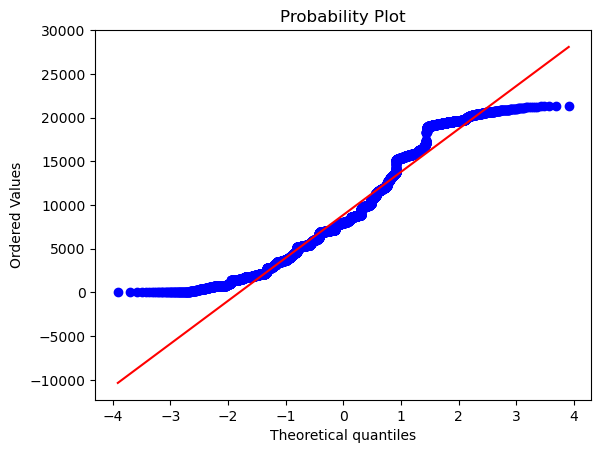

In [248]:
plt.figure()
probplot(age_18_to_25['Purchase'],plot=plt)
plt.show()


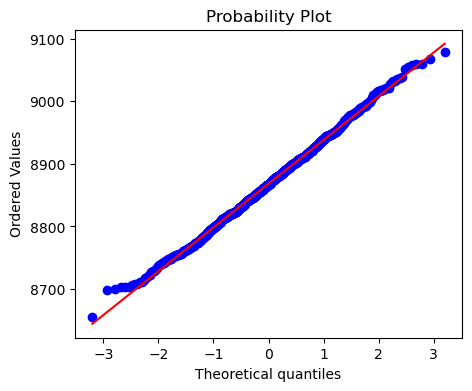

In [249]:
age_18_to_25_boots_mean = []
sample_size = 5000
for i in range(1000):
 s=resample(age_18_to_25['Purchase'],n_samples=sample_size)
 m=np.mean(s)
 age_18_to_25_boots_mean.append(m)


plt.figure(figsize=(5,4))
probplot(age_18_to_25_boots_mean,plot=plt)
plt.show()

# Age : from 26 to 35

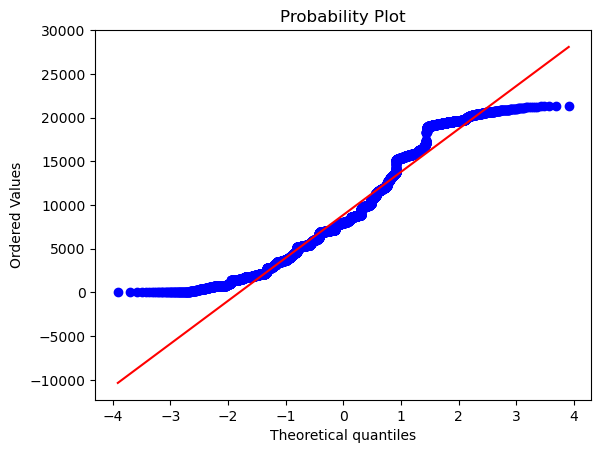

In [250]:
age_26_to_35=df1[df1['Age']=='0-17']
age_26_to_35

plt.figure()
probplot(age_26_to_35['Purchase'],plot=plt)
plt.show()


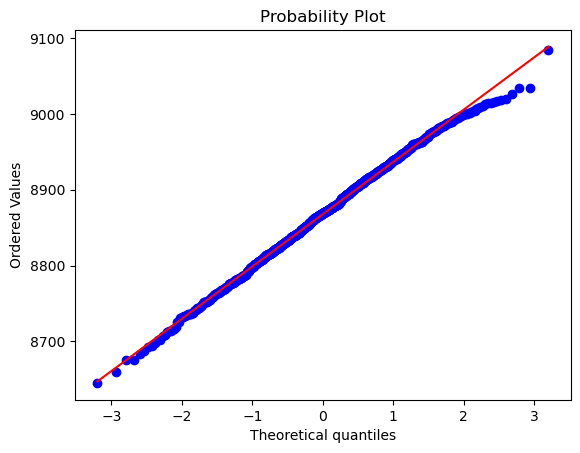

In [251]:
age_26_to_35_boots_mean = []
sample_size = 5000
for i in range(1000):
 s=resample(age_26_to_35['Purchase'],n_samples=sample_size)
 m=np.mean(s)
 age_26_to_35_boots_mean.append(m)


plt.figure()
probplot(age_26_to_35_boots_mean,plot=plt)
plt.show()

# Age : from 36 to 50

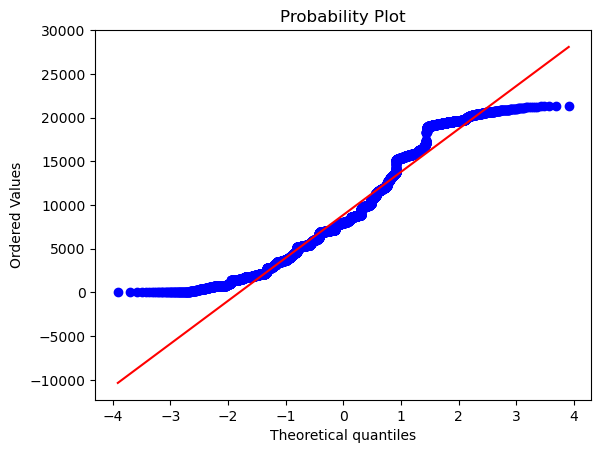

In [252]:
age_36_to_50=df1[df1['Age']=='0-17']
age_36_to_50

plt.figure()
probplot(age_36_to_50['Purchase'],plot=plt)
plt.show()


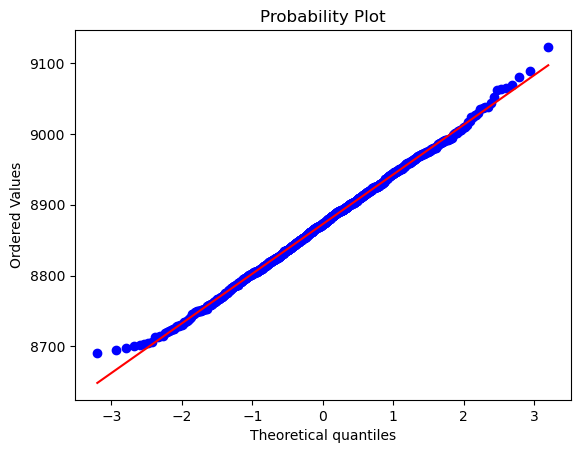

In [253]:
age_36_to_50_boots_mean = []
sample_size = 5000
for i in range(1000):
 s=resample(age_36_to_50['Purchase'],n_samples=sample_size)
 m=np.mean(s)
 age_36_to_50_boots_mean.append(m)


plt.figure()
probplot(age_36_to_50_boots_mean,plot=plt)
plt.show()

# age : 51+

In [254]:
Age_51=df1.loc[(df1.Age=='51-55')|(df1.Age=='55+')]
Age_51

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
14,1000006,P00231342,F,51-55,9,A,1,0,5,5378
15,1000006,P00190242,F,51-55,9,A,1,0,4,2079
16,1000006,P0096642,F,51-55,9,A,1,0,2,13055
17,1000006,P00058442,F,51-55,9,A,1,0,5,8851
...,...,...,...,...,...,...,...,...,...,...
550030,1005980,P00372445,M,55+,1,C,3,0,20,376
550037,1005993,P00370293,F,51-55,20,C,1,1,19,62
550042,1006002,P00371644,M,51-55,0,C,1,1,20,243
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368


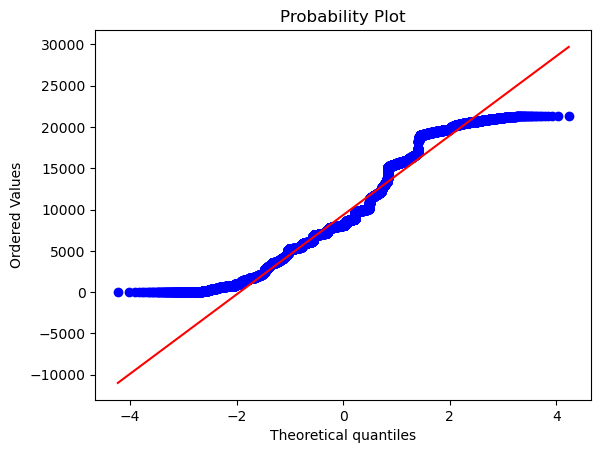

In [255]:
plt.figure()
probplot(Age_51['Purchase'],plot=plt)
plt.show()


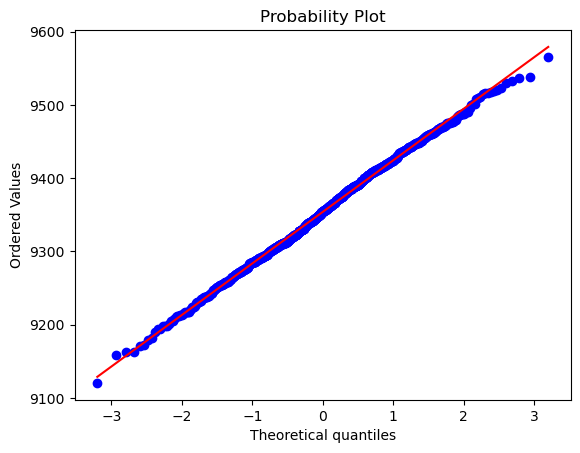

In [256]:
Age_51_boots_mean = []
sample_size = 5000
for i in range(1000):
 s=resample(Age_51['Purchase'],n_samples=sample_size)
 m=np.mean(s)
 Age_51_boots_mean.append(m)


plt.figure()
probplot(Age_51_boots_mean,plot=plt)
plt.show()

[]

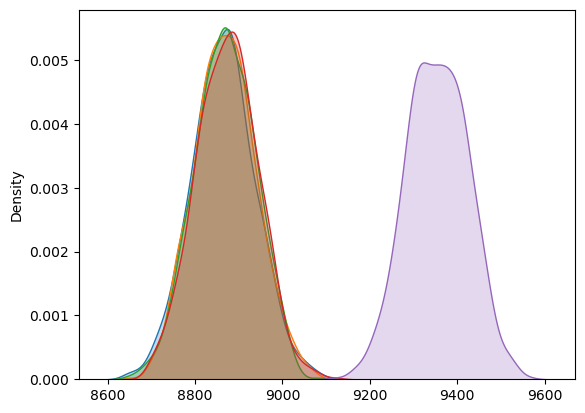

In [257]:
sns.kdeplot(age_0_to_17_boots_mean,fill=True)
sns.kdeplot(age_18_to_25_boots_mean,fill=True)
sns.kdeplot(age_26_to_35_boots_mean,fill=True)
sns.kdeplot(age_36_to_50_boots_mean,fill=True)
sns.kdeplot(Age_51_boots_mean,fill=True)
plt.plot()

#### different age groups are  overlapping each other


# RECOMMENDATIONS

### Most of the purchases are made by men, so increase the number of items that are mostly used by men.
###  People aged between 26 to 35 have made the most purchases, so concentrate more products on them.
### People bought most of the products from the category 5,1,and 8. so increase the availability of these items.
### People with occupation 4,0 and 7 (masked) are bought more products.
### B is the city where the lots of purchases happened.So try to cell more products in city B
### Produce more P00265242 ,  P00025442  &  P00110742 since these are most sold products